In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

In [3]:
#Reading the data

df = pd.read_csv("People Charm case.csv")

In [4]:
df.shape #14999 rows and 10 columns are there in the dataframe

(14999, 10)

In [5]:
df.head() #checking the first 5 values 

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [6]:
df.tail() #checking the last 5 values

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low
14998,0.77,0.83,6,271,3,0,0,0,support,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe()  # Checking the basic statistical details

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum() # Checking the null values

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

So we can say that there is no null value present in the data set

In [10]:
df[df.duplicated()].shape   #checking for the duplicates values

(3008, 10)

So here we can see that there are 3008 are duplicated so we have to drop those rows else the model will be overfitted

In [11]:
df = df.drop_duplicates() #Droping the duplicated rows from the dataset

In [12]:
df[df.duplicated()].shape  # all the duploicated rows are dropped

(0, 10)

In [13]:
df.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [14]:
df.dept.value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: dept, dtype: int64

In [15]:
df.corr() ## Checking the correlation between the attributes 

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


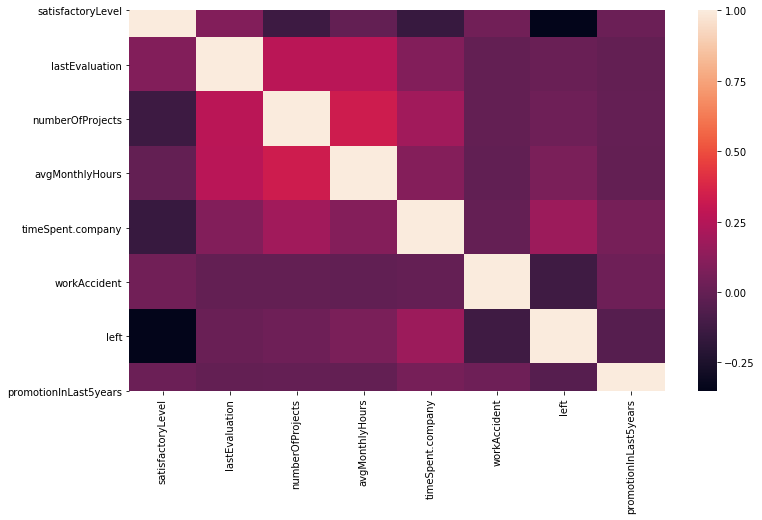

In [16]:
plt.figure(figsize= (12,7))
sb.heatmap(df.corr())

In [17]:
numeric_data = df._get_numeric_data() #getting only the numeric columns

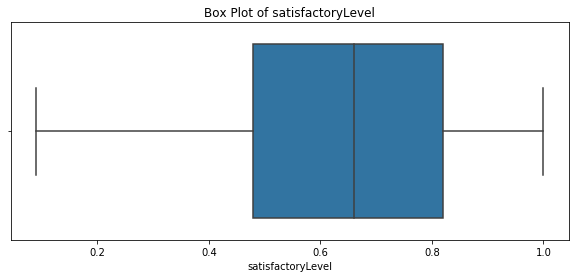

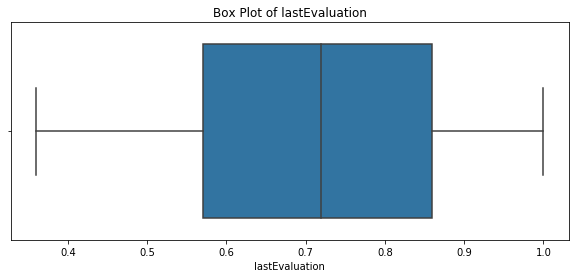

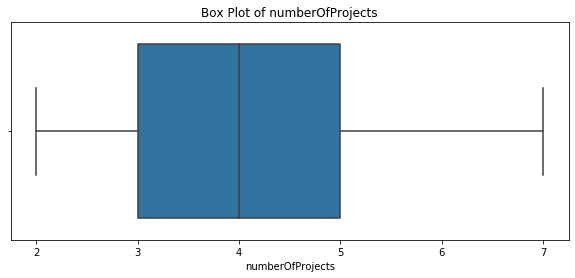

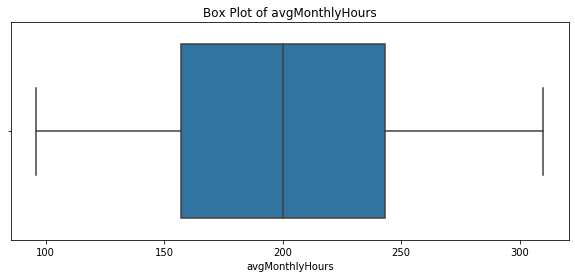

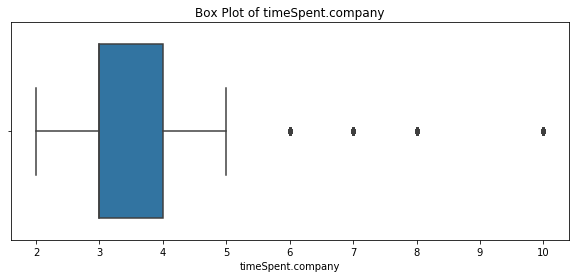

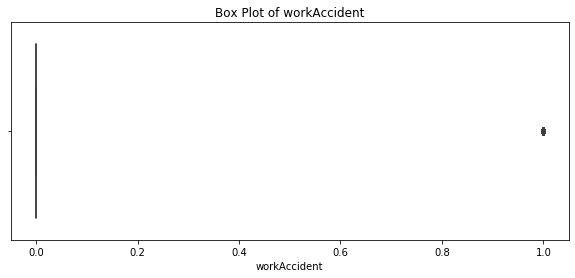

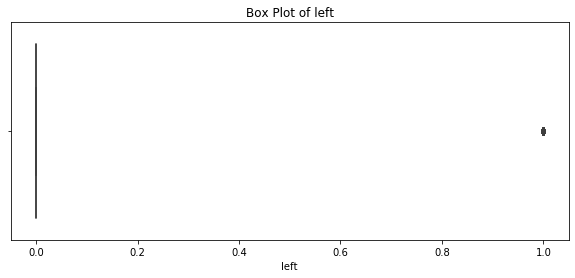

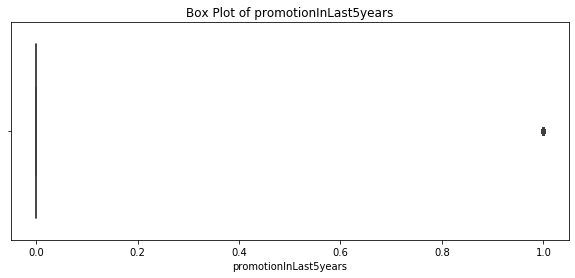

In [18]:
#Checking the outliers

for num_variable in numeric_data.columns:
    fig,axes = plt.subplots(figsize=(10,4))
    sb.boxplot( x=num_variable, data = numeric_data)
    plt.title(str('Box Plot of ') + str(num_variable))

In [19]:
df.skew() #checking the skewness

satisfactoryLevel       -0.538702
lastEvaluation          -0.031686
numberOfProjects         0.332152
avgMonthlyHours          0.027208
timeSpent.company        1.816577
workAccident             1.914410
left                     1.795135
promotionInLast5years    7.490008
dtype: float64

In [20]:
df=pd.get_dummies(df,columns=['dept']) #using get_dummies converting the categorical to numerica column with the values of 0 and 1

In [21]:
x1 = LabelEncoder() #using LabelEncoder() converting the values of categrorical to numerical with 0,1,2
df['salary'] = x1.fit_transform(df.salary)
#df['dept'] = x1.fit_transform(df.dept)
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [22]:
x= df.drop('left', axis=1) #Creating the x variable that is independent variable
y = df.left                # Creating the target varibale that is dependent variable

In [23]:
#spliting the data in to the train and the test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

### KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print("KNN Score = ", knn.score(x_test, y_test)*100)
prediction = knn.predict(x_test)

KNN Score =  94.24760316798665


In [25]:
k_list = [i for i in range(1,30)] 
#k_list is the list of values from 1 to 29

In [26]:
mis_class = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    mis_class.append(sum(prediction!= y_test))

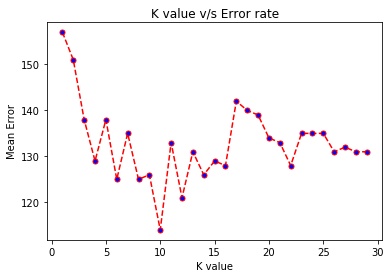

In [27]:
## we can check for which k value we are getting less error or missclassification. 
plt.plot(k_list, mis_class, color = 'red', linestyle ='dashed', marker = 'o', markerfacecolor ='blue', markersize = 5)
plt.title('K value v/s Error rate')
plt.xlabel('K value')
plt.ylabel('Mean Error')
plt.show()

from the graph we can say that k value should be 10

In [28]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
print("KNN Score = ", knn.score(x_test, y_test)*100)
y_pred = knn.predict(x_test)
print(y_pred)

KNN Score =  95.24802000833681
[0 0 0 ... 0 0 0]


In [29]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KNN:", cm, sep='\n')

Confusion Matrix for KNN:
[[1935   72]
 [  42  350]]


In [30]:
probs = knn.predict_proba(x_test)
probs

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ]])

In [31]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.9493297692769186


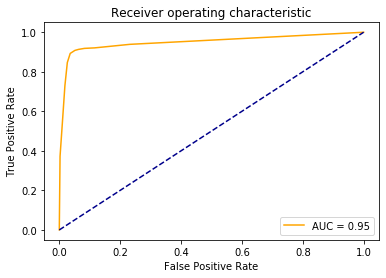

In [32]:
#plot Roc curve
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression

In [33]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[[-3.79471881e+00  4.86559423e-01 -2.60193656e-01  3.79185766e-03
   2.86094386e-01 -1.34138218e+00 -7.27578896e-01  4.82599399e-02
   5.15290198e-02 -4.81906649e-01 -9.41827894e-02  1.73670944e-01
  -5.18704875e-01 -3.43086798e-02  7.82115478e-03  3.21364079e-02
   1.95457454e-01  1.28336196e-01]]
[-0.57627627]


C:\Users\Subhamoy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
y_pred = reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Confusion Matrix:
[[1944   63]
 [ 308   84]]


In [36]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score is:",accuracy)

Accuracy score is: 0.8453522300958732


In [37]:
probs = reg.predict_proba(x_test)
probs

array([[0.83664774, 0.16335226],
       [0.91228473, 0.08771527],
       [0.96147817, 0.03852183],
       ...,
       [0.85623812, 0.14376188],
       [0.80804996, 0.19195004],
       [0.81232928, 0.18767072]])

In [38]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.8315538472489143


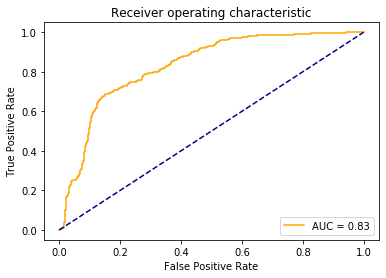

In [39]:
#plot Roc curve
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gaussian naive bayes

In [40]:
ganb = GaussianNB()
ganb.fit(x_train, y_train)
y_pred = ganb.predict(x_test)
print("Accuracy score is",ganb.score(x_test,y_test))

Accuracy score is 0.826594414339308


In [41]:
y_pred = ganb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Confusion Matrix:
[[1709  298]
 [ 118  274]]


In [43]:
probs = ganb.predict_proba(x_test)
probs

array([[5.63718003e-01, 4.36281997e-01],
       [5.51794756e-01, 4.48205244e-01],
       [9.99876356e-01, 1.23643959e-04],
       ...,
       [8.09737943e-01, 1.90262057e-01],
       [9.99939251e-01, 6.07492406e-05],
       [7.96004908e-01, 2.03995092e-01]])

In [44]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.8451808974710959


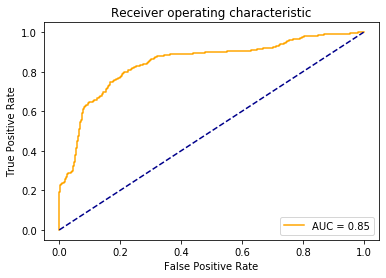

In [45]:
#plot Roc curve
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Multinomial Naive Bayse

In [46]:
mlnb = MultinomialNB()
mlnb.fit(x_train, y_train)
y_pred = mlnb.predict(x_test)
print("Accuracy is:",mlnb.score(x_test,y_test))

Accuracy is: 0.8365985827428095


In [47]:
y_pred = mlnb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Confusion Matrix:
[[2007    0]
 [ 392    0]]


In [49]:
probs = mlnb.predict_proba(x_test)
probs

array([[0.82480725, 0.17519275],
       [0.81932205, 0.18067795],
       [0.9422558 , 0.0577442 ],
       ...,
       [0.83364275, 0.16635725],
       [0.67933003, 0.32066997],
       [0.77596307, 0.22403693]])

In [50]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.7992523616322462


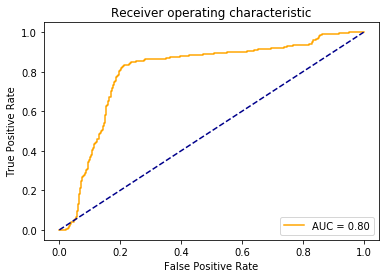

In [51]:
#plot Roc curve
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [52]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cols = list(x.columns.values)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Confusion Matrix:
[[1952   55]
 [  28  364]]


In [53]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score is:",accuracy)

Accuracy score is: 0.9654022509378908


In [54]:
probs = clf.predict_proba(x_test)
probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [55]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.9505836714356894


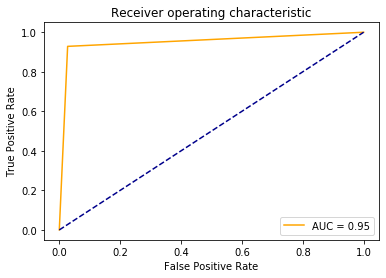

In [56]:
#plot Roc curve
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

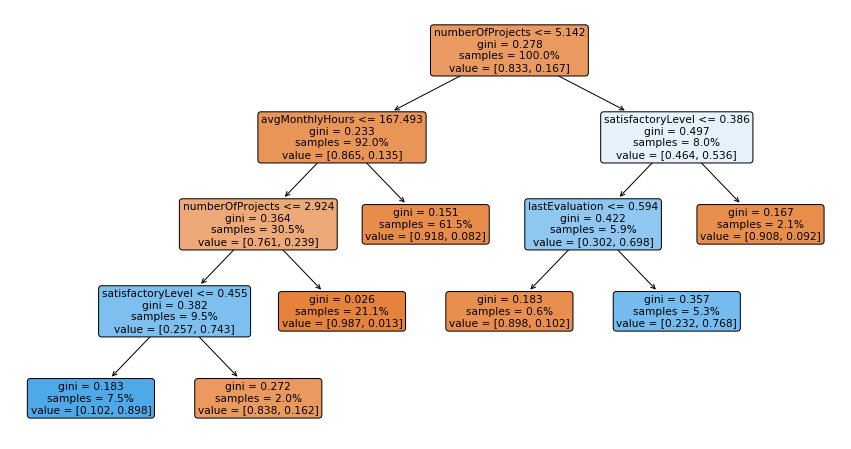

In [57]:
clf = DecisionTreeClassifier( criterion= "gini", splitter = 'random', max_leaf_nodes = 7, min_samples_leaf = 6, max_depth = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cols = list(x.columns.values)
plt.figure(figsize= (15,8))
tree.plot_tree( clf.fit(x_train, y_train), feature_names = cols, filled = True, precision = 3, proportion = True, rounded = True)
plt.show()

In [58]:
accuerecy = accuracy_score(y_pred, y_test)
accuerecy

0.8732805335556482

### Random Forest

In [59]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

#n_estimators indicates the number of trees in the forest

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is:", accuracy)

Accuracy score is: 0.9824927052938724


In [60]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Confusion Matrix:
[[1998    9]
 [  33  359]]


In [61]:
probs = rf.predict_proba(x_test)
probs

array([[0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.86, 0.14]])

In [62]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.9799305746214779


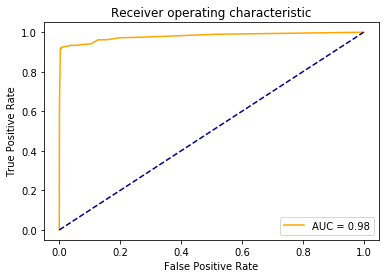

In [63]:
#plot Roc curve
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### AdaBoost

In [64]:
ab = AdaBoostClassifier(n_estimators = 100)
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))

Accuracy score is: 0.9633180491871614


In [65]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')
probs = ab.predict_proba(x_test)
probs

Confusion Matrix:
[[1961   46]
 [  42  350]]


array([[0.51280443, 0.48719557],
       [0.58890089, 0.41109911],
       [0.52246001, 0.47753999],
       ...,
       [0.5143842 , 0.4856158 ],
       [0.67794879, 0.32205121],
       [0.50668986, 0.49331014]])

In [66]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.9781021526697375


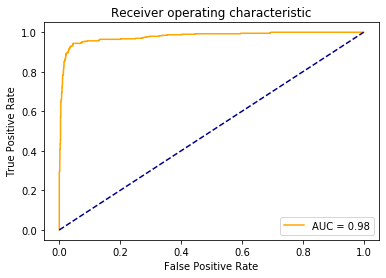

In [67]:
#plot Roc curve
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### GradientBoosting

In [68]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))

Accuracy score is: 0.9808253438932889


In [69]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')
probs = gb.predict_proba(x_test)
probs

Confusion Matrix:
[[1989   18]
 [  28  364]]


array([[0.98553895, 0.01446105],
       [0.99465553, 0.00534447],
       [0.99573468, 0.00426532],
       ...,
       [0.99090361, 0.00909639],
       [0.99050945, 0.00949055],
       [0.67215347, 0.32784653]])

In [70]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.9873065444413939


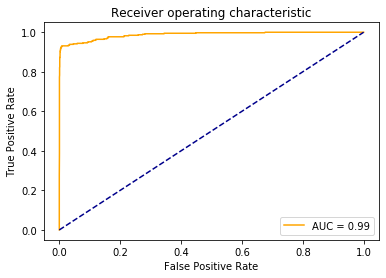

In [71]:
#plot Roc curve
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBClassifier

In [72]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))

Accuracy score is: 0.9799916631929971


In [73]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')
probs = gb.predict_proba(x_test)
probs

Confusion Matrix:
[[1990   17]
 [  31  361]]


array([[0.98553895, 0.01446105],
       [0.99465553, 0.00534447],
       [0.99573468, 0.00426532],
       ...,
       [0.99090361, 0.00909639],
       [0.99050945, 0.00949055],
       [0.67215347, 0.32784653]])

In [74]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.9873065444413939


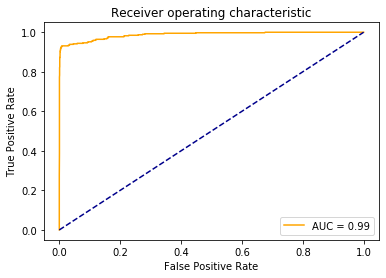

In [75]:
#plot Roc curve
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Applying the Min max scaler

In [76]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
mmsc_data = mmsc.fit_transform(df.drop('left', axis =1))
mmsc_data = pd.DataFrame(mmsc_data)
mmsc_data.columns = df.drop('left', axis =1).columns
mmsc_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.351648,0.218750,0.0,0.266355,0.125,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
x_train, x_test, y_train, y_test = train_test_split(mmsc_data,y, test_size = 0.2, random_state=0)

In [78]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print("KNN Score = ", knn.score(x_test, y_test)*100)
prediction = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

KNN Score =  95.12296790329304
Confusion Matrix:
[[1990   17]
 [  31  361]]


In [79]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

[[-3.44167828  0.40627129 -1.28397509  0.76870062  2.23493881 -1.34722009
  -1.51592859  0.10296527  0.04700778 -0.35412885 -0.02188789  0.19802406
  -0.35792547  0.02853912  0.05044552  0.11493721  0.15306254  0.13772357]]
[-0.39476609]
Accuracy score is: 0.8453522300958732
Confusion Matrix:
[[1942   65]
 [ 306   86]]


In [80]:
ganb = GaussianNB()
ganb.fit(x_train, y_train)
y_pred = ganb.predict(x_test)
print("Accuracy score is:",ganb.score(x_test,y_test))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Accuracy score is: 0.826594414339308
Confusion Matrix:
[[1709  298]
 [ 118  274]]


In [81]:
mlnb = MultinomialNB()
mlnb.fit(x_train, y_train)
y_pred = mlnb.predict(x_test)
print("Accuracy is:",mlnb.score(x_test,y_test))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Accuracy is: 0.8365985827428095
Confusion Matrix:
[[2007    0]
 [ 392    0]]


In [82]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')
print("Accuracy score is:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1954   53]
 [  28  364]]
Accuracy score is: 0.9662359316381826


In [83]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Accuracy score is: 0.9824927052938724
Confusion Matrix:
[[1998    9]
 [  33  359]]


In [84]:
ab = AdaBoostClassifier(n_estimators = 100)
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Accuracy score is: 0.9633180491871614
Confusion Matrix:
[[1961   46]
 [  42  350]]


In [85]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Accuracy score is: 0.9808253438932889
Confusion Matrix:
[[1989   18]
 [  28  364]]


In [86]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm, sep='\n')

Accuracy score is: 0.9799916631929971
Confusion Matrix:
[[1990   17]
 [  31  361]]


### Applying the RobustScaler

In [87]:
from sklearn.preprocessing import RobustScaler
rbsc = RobustScaler()
rbsc_data = rbsc.fit_transform(x)
rbsc_data = pd.DataFrame(rbsc_data)
rbsc_data.columns = x.columns

In [88]:
x_train, x_test, y_train, y_test = train_test_split(rbsc_data,y, test_size = 0.2, random_state=0)

In [89]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
print("KNN Score = ", knn.score(x_test, y_test)*100)
prediction = knn.predict(x_test)

KNN Score =  95.41475614839516


In [90]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))

[[-1.30372821  0.18981784 -0.53449231  0.31796525  0.2877222  -1.3519434
  -1.52855783  0.05234143  0.04836011 -0.35413932 -0.02169225  0.1999266
  -0.36295029  0.02856292  0.05198727  0.11649376  0.1560222   0.14078561]]
[-2.1490902]
Accuracy score is: 0.8449353897457273


In [91]:
ganb = GaussianNB()
ganb.fit(x_train, y_train)
y_pred = ganb.predict(x_test)
print("Accuracy score is:",ganb.score(x_test,y_test))

Accuracy score is: 0.826594414339308


In [92]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cols = list(x.columns.values)
print("Accuracy score is:",accuracy_score(y_test, y_pred))

Accuracy score is: 0.9704043351396415


In [93]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))

Accuracy score is: 0.9824927052938724


In [94]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))

Accuracy score is: 0.9808253438932889


In [95]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test, y_pred))

Accuracy score is: 0.9799916631929971


After applying Minmax and Robust scaler it's not effecting much for this dataset. Random Forest is performing better in all the cases. without applying the normalization also it was giving 98.24% accuracy .

### Which model gives best accuracy and why?

Here I can conclude that For all the cases Random Forest is performing better it is giving 98.24% accuracy.
Random Forest is performing better because in case of traning the model it creates different samples and for each sample it creates a Decision Tree. Each decision tree predicts the records in the test set independently. For the each value in the test set Random forest uses class with majority votes for the final prediction. so there is more learning in between so it is performing better than other model.

### Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s?

No accuracy is not the best evaluation metric. As we can see that in case of multinomial naive bayse the confusion matrix is showning [[2007   0] [ 392    0]] means it is not able to predict the  class 2 values at all. but it is showing 83.65 % accuracy that is quite good accuracy. So if we only follow the accuracy then our model prediction may go wrong. So we should look at the confusion matrix and the roc curve and the area under the curve, higher the value under the curve better the perdiction is. 
ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution.
If the proportion of positive to negative instances changes in a test set, the ROC curves will not change. Metrics such as accuracy use values from both columns of the confusion matrix. As a class distribution changes these measures will change as well.

So, I will suggest confusion matrix or ROC- AUC may be better metrics than accuracy for this dataset.

# <center> END </center>